In [1]:
import matplotlib.image as mpimg

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np


A) Download the dataset “Digit” and its label from this link:  https://app.box.com/s/sogk96kukv6ayyyy6ym63a2nu3aozif7Links to an external site.

Check out the dataset. It includes 1797 small images (8x8 pixels), each one includes a hand-written digit (0-9). You have to download the corresponding csv file that includes the labels of the images. The goal is to build a Machine Learning Algorithm that can recognize the hand-written digits!

Import the following two libraries to work with images:

import matplotlib.image as mpimg

import matplotlib.pyplot as plt

you can use:

mpimg.imread(file_name)   to load an image, and

plt.imshow(image_name, cmap=plt.cm.gray_r, interpolation='nearest')  to show an image.

Add   %matplotlib inline   at top of your code to make sure that the images will be shown inside the Jupyter explorer page.

In [2]:


labels = pd.read_csv('label.csv')



B) Build the feature matrix and label vector: Each image is considered as a data sample with pixels as features. Thus, to build the feature table you have to convert each 8x8 image into an array of 64 elements (i.e. 64 pixels), and put it as a row of the feature matrix with 64 feature columns.

In [3]:
images=[]
for i in range(1797):
    img = mpimg.imread( str(i) + '.jpg')

    images.append(img)
    
print(images[0])

[[  0   2  88 217 158  21   0   0]
 [ 16   0 228 236 166 253  95   0]
 [  0  41 255  44  11 182 132   3]
 [ 11  80 220   0   2 143 133   5]
 [  6  71 122   0   5 155 140   0]
 [  0  76 194   0  26 207 105  15]
 [  0  18 255  83 146 211   4   0]
 [  4   3  87 228 182   0   9   2]]


In [4]:

#plt.imshow(mpimg.imread('0.jpg'), cmap=plt.cm.gray_r, interpolation='nearest') 
# plt.imshow(images[1796], cmap=plt.cm.gray_r, interpolation='nearest') 

In [5]:
#B 


In [6]:
from sklearn import datasets 


C) Use sklearn functions to split the dataset into testing and training sets with the following parameters: test_size=0.1, random_state=2.


In [7]:

from   sklearn.ensemble    import    RandomForestClassifier

X = np.array([imagesstuff.flatten() for imagesstuff in images])
y = labels['digit label']

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.1, random_state=2)


D) Use scikit-learn “Random Forest” classifier to recognize the hand-written digits based on the training/testing datasets that you built in part (c). Use this command to import and define your classifier:

from   sklearn.ensemble    import    RandomForestClassifier

my_RandomForest =

RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=2)

Use my_RandomForest.fit for training your random forest classifier and my_RandomForest.predict  for prediction. Test your Machine Learning Algorithm on testing set (from part(c)), and calculate and report the accuracy.

In [8]:
my_RandomForest = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=2)
my_RandomForest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=19, random_state=2)

In [9]:
predicted = my_RandomForest.predict(X_test)

score = accuracy_score(y_test,predicted)
print(score)

0.9277777777777778


E) Write some codes to find which one of the data samples (i.e. which images) have been misclassified (classified incorrectly) in your testing set. Then, use the following command to show the misclassified images:    plt.imshow(image_name, cmap=plt.cm.gray_r, interpolation='nearest')  

In [10]:
wrong_values = np.where(predicted != y_test)[0]
print(wrong_values)

[  4  16  41  44  45  49  63  66 115 130 137 165 174]


In [11]:

# print(y_test['digit label'])
print(y_test)


154     4
564     0
1444    9
1394    1
1660    4
       ..
458     0
68      4
825     0
1153    0
1095    4
Name: digit label, Length: 180, dtype: int64


In [12]:
print(predicted)

[4 0 9 1 8 7 1 5 1 6 6 7 6 1 5 5 7 6 2 7 4 6 4 1 5 2 9 5 4 6 5 6 3 4 0 9 9
 8 4 6 8 1 5 7 5 4 9 6 1 7 0 1 9 7 3 3 1 1 8 8 9 8 5 7 4 7 2 5 8 4 3 1 3 8
 7 3 3 0 8 7 2 8 5 3 8 7 6 4 6 2 2 0 1 1 5 3 5 7 6 8 2 2 6 4 6 7 3 7 3 9 4
 7 0 3 5 1 5 0 3 9 2 7 3 2 0 8 1 9 2 1 5 1 0 3 4 3 0 7 3 2 2 7 3 1 6 7 2 8
 3 1 1 6 4 8 2 1 8 4 1 3 1 1 9 5 4 5 7 4 8 9 5 7 6 9 4 0 4 0 0 4]


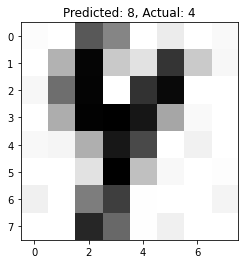

4


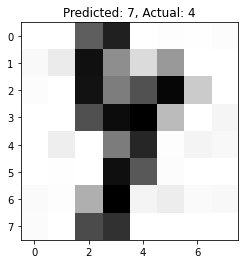

16


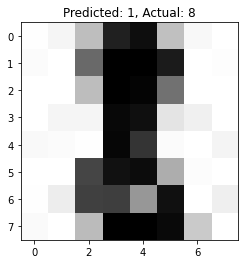

41


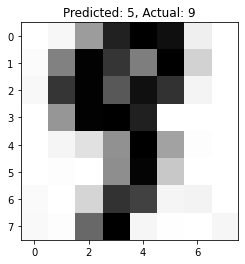

44


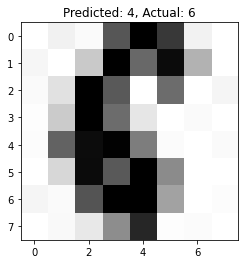

45


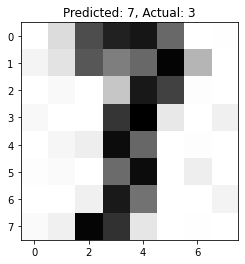

49


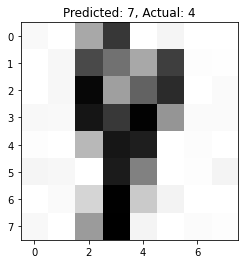

63


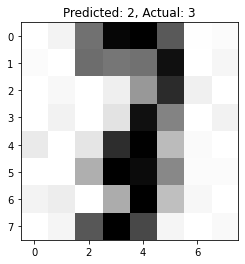

66


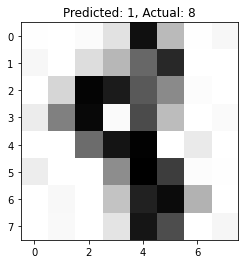

115


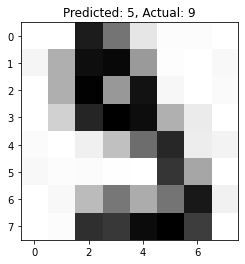

130


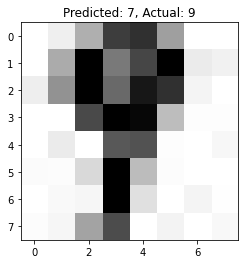

137


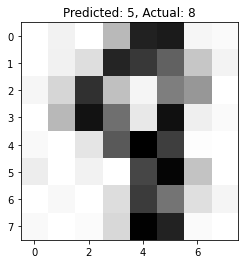

165


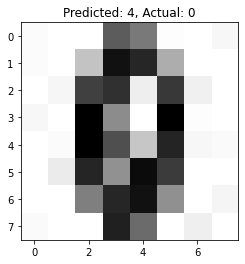

174


In [14]:
%matplotlib inline  
for index in wrong_values:
    plt.imshow(X_test[index].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title("Predicted: {}, Actual: {}".format(predicted[index], y_test.iloc[index]))
    plt.show()
    print(index)

## 